In [1]:
#import library
import pandas as pd
import numpy as np
import os

In [2]:
#set directory
os.chdir(r"C:\Users\Roswita Hede\Documents\Practice\Python\Data cleaning Fifa")

In [3]:
df=pd.read_csv('fifa_data.csv')
df.head()

C:\Users\Roswita Hede\AppData\Local\Temp\ipykernel_5144\4149136924.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fifa_data.csv')


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

# Data Cleaning

In [5]:
#Drop unecessary column
df_drop=['photoUrl','playerUrl','Loan Date End','Release Clause']
df=df.drop(columns=df_drop)

In [6]:
#Clean the Team & Contract table
#Split team and contract into 2 columns
df['Team & Contract']=df['Team & Contract'].astype('str')
df['Team & Contract'].replace('\n', '', regex=True, inplace=True)
test=df['Team & Contract'][0]
Team=[]

Contract_Duration=[]
for i in range(len(df['Team & Contract'])):
    Team.append(str(df['Team & Contract'][i][:-11]))
    c=str(df['Team & Contract'][i][-11:])
    if c.startswith("2")==True:
        Contract_Duration.append(c)
    else:
        Contract_Duration.append("0")
df=df.drop(columns=['Team & Contract'])
df['Team']=Team
df['Contract_Duration']=Contract_Duration

In [7]:
df.head()

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,ID,Height,Weight,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract_Duration
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,158023,"5'7""",159lbs,...,5 ★,85,92,91,95,38,65,\n372,FC Barcelona,2004 ~ 2021
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,"6'2""",183lbs,...,5 ★,89,93,81,89,35,77,\n344,Juventus,2018 ~ 2022
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,200389,"6'2""",192lbs,...,3 ★,87,92,78,90,52,90,\n86,Atlético Madrid,2014 ~ 2023
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,"5'11""",154lbs,...,4 ★,76,86,93,88,64,78,\n163,Manchester City,2015 ~ 2023
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,190871,"5'9""",150lbs,...,5 ★,91,85,86,94,36,59,\n273,Paris Saint-Germain,2017 ~ 2022


In [8]:
df['Hits'].isna().sum()

0

In [9]:
#Clean Hits Column
import numpy as np

hits = []

for x in range(len(df["Hits"])):
    s = str(df["Hits"][x])
    s = s[1:].replace('K', '00')
    s = s.replace('/n', '')
    hits.append(s)

# Update the 'Hits' column with the new values
df['Hits'] = hits

# Convert the 'Hits' column to the desired data type, handling empty strings
df['Hits'] = pd.to_numeric(df['Hits'], errors='coerce').fillna(0).astype(int)


In [10]:
df['Hits'].head()


0    372
1    344
2     86
3    163
4    273
Name: Hits, dtype: int32

In [11]:
#Checking joined column
df['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2    Jul 16, 2014
3    Aug 30, 2015
4     Aug 3, 2017
Name: Joined, dtype: object

In [12]:
#Changing the joined column into proper data time format
def month_to_number(x):
            if x== 'Jan':
                return 1
            elif x == 'Feb':
                return 2
            elif x == 'Mar': 
                return 3
            elif x == 'Apr':
                return 4
            elif x == 'May':
                return 5
            elif x == 'Jun': 
                return 6
            elif x == 'Jul': 
                return 7
            elif x == 'Aug': 
                return 8
            elif x == 'Sep': 
                return 9
            elif x == 'Oct': 
                return 10
            elif x == 'Nov':  
                return 11
            elif x == 'Dec':  
                return 12

In [13]:
date = []
for x in range(len(df['Joined'])):
    d = df['Joined'][x]
    c = d.split(" ")
    month = str(month_to_number(c[0]))
    day = str(c[1].replace(',',''))
    year = str(c[2])
    if len(day) == 1:
        day = ('0'+str(day))
    date_long = (str(month)+'/'+str(day)+'/'+str(year))
    date_con = pd.to_datetime(date_long)
    date.append(date_con)

In [14]:
df['Joined']=date
df['Joined'].head()

0   2004-07-01
1   2018-07-10
2   2014-07-16
3   2015-08-30
4   2017-08-03
Name: Joined, dtype: datetime64[ns]

In [15]:
#Change height into inches
temp_height=[]
for i in range(len(df['Height'])):
    i=df['Height'][i].replace('"','').split("'")
    inches=int(i[0])*12+int(i[1])
    temp_height.append(inches)
df['Height']=temp_height
df['Height'].head()

0    67
1    74
2    74
3    71
4    69
Name: Height, dtype: int64

In [16]:
#cleaning weight
temp_weight=[]
for x in range(len(df['Weight'])):
    temp_weight.append(int(df['Weight'][x].replace('lbs','')))
df['Weight']=temp_weight
df['Weight'].head()

0    159
1    183
2    192
3    154
4    150
Name: Weight, dtype: int64

In [17]:
df['Value'].head()

0    €67.5M
1      €46M
2      €75M
3      €87M
4      €90M
Name: Value, dtype: object

In [18]:
temp_value=[]
for i in range(len(df['Value'])):
    value = df['Value'][i]
    value = value.replace('€','')
    value = value.replace('K','000')
    value = value.replace('M','000000')
    value = value.replace('.','F')
    if 'F' in value:
        value = value.replace('F','')
        value = value=int(value)/10
    temp_value.append(int(value))
df['Value']=temp_value
df['Value'].head()

0    67500000
1    46000000
2    75000000
3    87000000
4    90000000
Name: Value, dtype: int64

In [19]:
temp_wage=[]
for i in range(len(df['Wage'])):
    Wage = df['Wage'][i]
    Wage = Wage.replace('€','')
    Wage = Wage.replace('K','000')
    Wage = Wage.replace('M','000000')
    Wage = Wage.replace('.','F')
    if 'F' in Wage:
        Wage = Wage.replace('F','')
        Wage = Wage=int(Wage)/10
    temp_wage.append(int(Wage))
df['Wage']=temp_wage
df['Wage'].head()

0    560000
1    220000
2    125000
3    370000
4    270000
Name: Wage, dtype: int64

In [20]:
df['SM'].head()

0    4★
1    5★
2    1★
3    4★
4    5★
Name: SM, dtype: object

In [21]:
df['W/F'].head()

0    4 ★
1    4 ★
2    3 ★
3    5 ★
4    5 ★
Name: W/F, dtype: object

In [22]:
df['IR'].head()

0    5 ★
1    5 ★
2    3 ★
3    4 ★
4    5 ★
Name: IR, dtype: object

In [23]:
import re

# Remove non-digit characters from 'W/F' column
df['W/F'] = df['W/F'].apply(lambda x: re.sub(pattern="[^\d]", repl=" ", string=x))
df['SM'] = df['SM'].apply(lambda x: re.sub(pattern="[^\d]", repl=" ", string=x))
df['IR'] = df['IR'].apply(lambda x: re.sub(pattern="[^\d]", repl=" ", string=x))
df['W/F'].head()
df['SM'].head()
df['IR'].head()

0    5 star star
1    5 star star
2    3 star star
3    4 star star
4    5 star star
Name: IR, dtype: object

In [24]:
df['Positions'].unique()

array(['RW ST CF', 'ST LW', 'GK', 'CAM CM', 'LW CAM', 'ST', 'ST LW RW',
       'RW', 'LW', 'CB', 'CDM', 'CF ST', 'CDM CM', 'CDM RB', 'CF CAM',
       'LW RW', 'LW ST', 'CM', 'RM LM CAM', 'RB', 'RW CAM CM', 'LB', 'CF',
       'LM CF', 'ST CF LW', 'RW LW', 'CM CDM', 'CAM RM RW', 'CAM CF ST',
       'CAM RM CF', 'LM ST', 'CM CDM CAM', 'LM', 'CAM RW', 'CB CDM',
       'RM LM RW', 'RW RM', 'CF LW CAM', 'CAM CM CF', 'LW CF', 'CM RM LM',
       'LB LM', 'CAM CM RM', 'CAM CF', 'LM RM LW', 'LM LB CM', 'CM LM LB',
       'RM CM', 'CAM CM LW', 'CB LB', 'RM RB', 'ST RW', 'LM RW LW',
       'RM RW', 'RB LB', 'RB RM', 'RM', 'CAM RM', 'RB RWB', 'CDM CB CM',
       'LM LW RM', 'CM CAM', 'CAM RM ST', 'LM RM', 'LM LWB', 'ST RM CF',
       'RW RM CF', 'LM RM CF', 'RM CF', 'RB CM', 'LW CAM RW', 'CAM LW CM',
       'CM CAM CDM', 'RW LW CAM', 'CM CAM LM', 'CM RM ST', 'CDM CM RB',
       'ST CAM', 'RM ST', 'LB CB LWB', 'CAM LW ST', 'RWB RM', 'CB CDM LB',
       'CM LM RM', 'LM LW', 'RW LW RM', 'RB CDM CM', '

In [25]:
temp_position=[]
for x in range(len(df['Positions'])):
    y=sorted(df['Positions'][x].split(' '))
    yx=' '.join(y)
    temp_position.append(yx)
    
df['Positions']=temp_position
df['Positions']=df['Positions'].astype(object)
df['Positions'].unique()

array(['CF RW ST', 'LW ST', 'GK', 'CAM CM', 'CAM LW', 'ST', 'LW RW ST',
       'RW', 'LW', 'CB', 'CDM', 'CF ST', 'CDM CM', 'CDM RB', 'CAM CF',
       'LW RW', 'CM', 'CAM LM RM', 'RB', 'CAM CM RW', 'LB', 'CF', 'CF LM',
       'CF LW ST', 'CAM RM RW', 'CAM CF ST', 'CAM CF RM', 'LM ST',
       'CAM CDM CM', 'LM', 'CAM RW', 'CB CDM', 'LM RM RW', 'RM RW',
       'CAM CF LW', 'CAM CF CM', 'CF LW', 'CM LM RM', 'LB LM',
       'CAM CM RM', 'LM LW RM', 'CM LB LM', 'CM RM', 'CAM CM LW', 'CB LB',
       'RB RM', 'RW ST', 'LM LW RW', 'LB RB', 'RM', 'CAM RM', 'RB RWB',
       'CB CDM CM', 'CAM RM ST', 'LM RM', 'LM LWB', 'CF RM ST',
       'CF RM RW', 'CF LM RM', 'CF RM', 'CM RB', 'CAM LW RW', 'CAM CM LM',
       'CM RM ST', 'CDM CM RB', 'CAM ST', 'RM ST', 'CB LB LWB',
       'CAM LW ST', 'RM RWB', 'CB CDM LB', 'LM LW', 'LW RM RW', 'CM LM',
       'LB LM RM', 'LW RM ST', 'CAM CM ST', 'LB LWB', 'CB RB', 'RM RW ST',
       'LWB', 'CAM LM', 'CAM', 'RB RM RW', 'CF LM LW', 'CAM LM LW',
       'CB RB RWB'

In [26]:
df = df.rename(columns={'Name': 'LongName', '↓OVA': 'Overall', 'POT': 'Potential', 'BOV': 'Best Overall', 'IR':'Reputation'})

In [27]:
df.head()

,LongName,Nationality,Positions,LongName,Age,Overall,Potential,ID,Height,Weight,...,Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract_Duration
0,Lionel Messi,Argentina,CF RW ST,L. Messi,33,93,93,158023,67,159,...,5 star star,85,92,91,95,38,65,372,FC Barcelona,2004 ~ 2021
1,C. Ronaldo dos Santos Aveiro,Portugal,LW ST,Cristiano Ronaldo,35,92,92,20801,74,183,...,5 star star,89,93,81,89,35,77,344,Juventus,2018 ~ 2022
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,200389,74,192,...,3 star star,87,92,78,90,52,90,86,Atlético Madrid,2014 ~ 2023
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,71,154,...,4 star star,76,86,93,88,64,78,163,Manchester City,2015 ~ 2023
4,Neymar da Silva Santos Jr.,Brazil,CAM LW,Neymar Jr,28,91,91,190871,69,150,...,5 star star,91,85,86,94,36,59,273,Paris Saint-Germain,2017 ~ 2022


In [28]:
#download the clean data into csv
FIFA21_clean=df
FIFA21_clean.to_csv('cleaned_fifa21_dataset.csv', index=False)


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

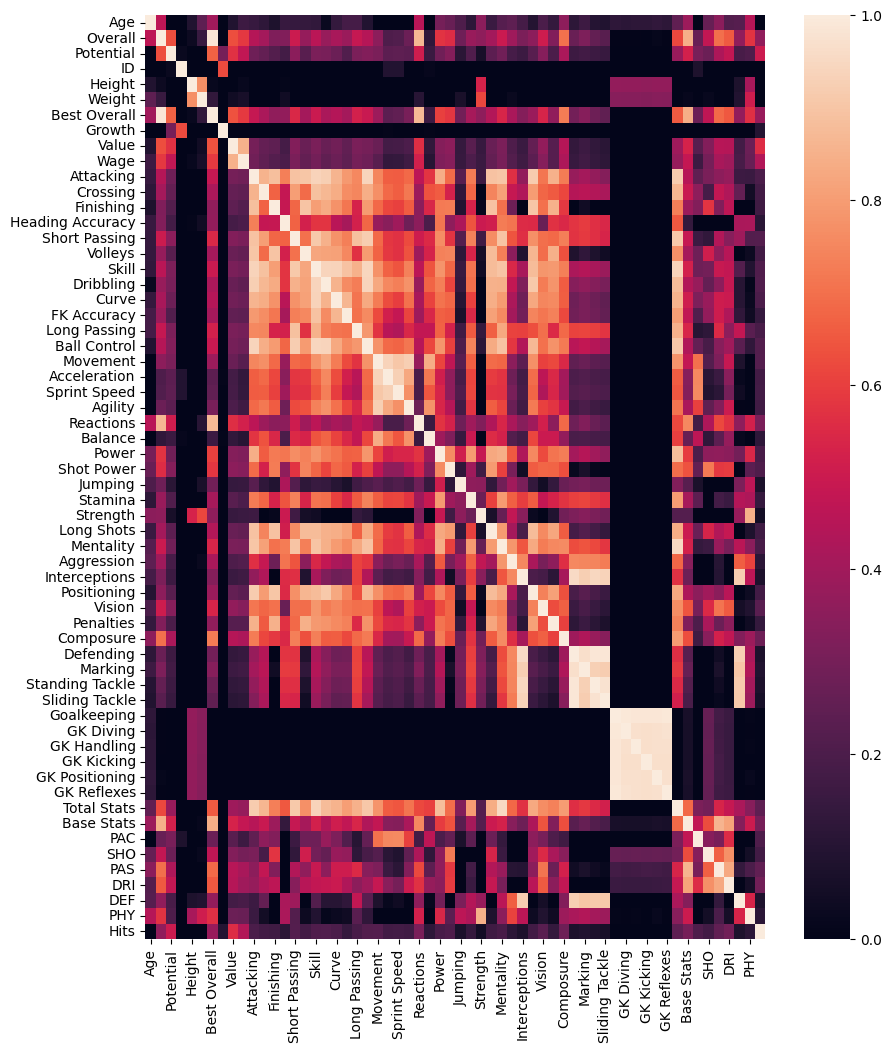

In [31]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(numeric_only=True), vmin=0)
plt.show()

Based on the heat map above, it can be seen that the goalkeer stats low correlation with value and wage of the  football player. The reason could be there are some other aspects to determine a value of goal keeper. Additionally, the variable height and weight have positive correlation to the goalkeeper stats, which means the higher the height, the better stats they are likely to have as goalkeeper.

# Exploratory Data Analysis

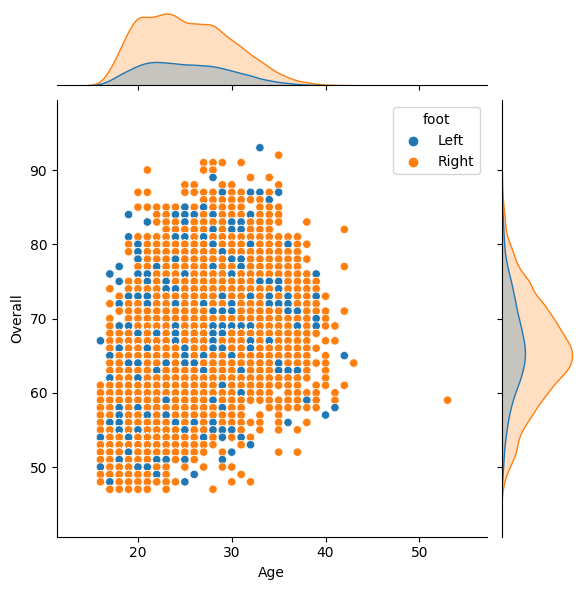

In [30]:
sns.jointplot(data=df, x='Age', y='Overall',hue='foot')

Based on the scatter plot above, there is outlier in Age variables where the football player  is more than 50 years old. I decide to not drop this data point because it is possible to have an active player who are in his 50s.

In [41]:
df.loc[df['Age']==53,['LongName','Nationality','Team']]


,LongName,LongName,Nationality,Team
16121,Kazuyoshi Miura,K. Miura,Japan,Yokohama FC


[Text(0.5, 1.0, 'Correlation of Value to Wage')]

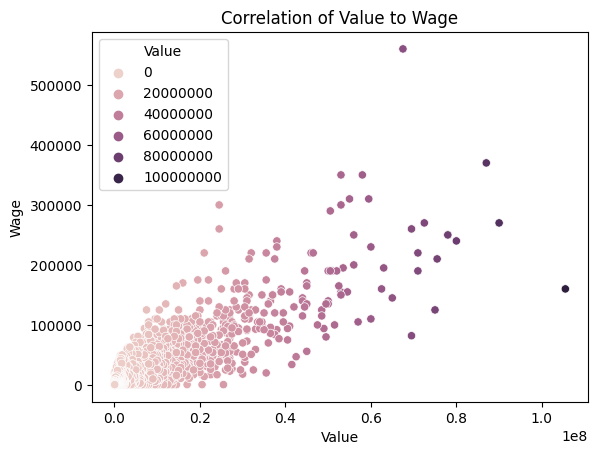

In [57]:
sns.scatterplot(data=df, x='Value',y='Wage', hue='Value').set(title="Correlation of Value to Wage")

Based on scatter plot above, it can be seen that there is a moderate positive correlation between Value and Wage, which indicate the higher the value could be a factor leads to higher wage However, there are 2 outlers, where one having higher value but lower wage, and the other have higher wage but lower value. let's find those two players

In [50]:
df[df.Value>100000000].loc[:,['LongName','Nationality','Team','Overall','Value', 'Wage','Joined']]

,LongName,LongName,Nationality,Team,Overall,Value,Wage,Joined
6,Kylian Mbappé,K. Mbappé,France,Paris Saint-Germain,90,105500000,160000,2018-07-01


In [51]:
df[df.Wage>500000].loc[:,['LongName','Nationality','Team','Overall','Value', 'Wage','Joined']]

,LongName,LongName,Nationality,Team,Overall,Value,Wage,Joined
0,Lionel Messi,L. Messi,Argentina,FC Barcelona,93,67500000,560000,2004-07-01


[Text(0.5, 1.0, 'Correlation of Overall to Wage')]

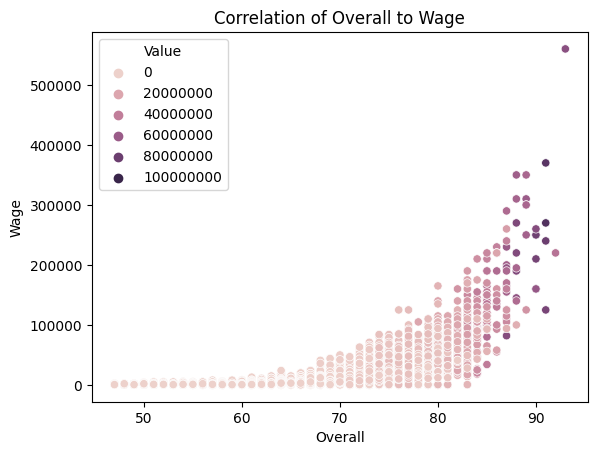

In [58]:
sns.scatterplot(data=df, x='Overall',y='Wage', hue='Value').set(title="Correlation of Overall to Wage")

For the overal less than 80, there seems lower correlation between overall and wage. However, it can be seen that for player with overall more than 80 points, have strong and positive impact to value and wage. because of that, I will look in more deeper to identify player having high overall rating but low market value and low wage.

The tables below shows football players having high overall rating but low market value

In [64]:

df[(df.Overall>85) & (df.Value<=20000000)].loc[:,['LongName','Nationality','Team','Overall','Value', 'Wage','Joined']].sort_values(by='Wage')

,LongName,LongName,Nationality,Team,Overall,Value,Wage,Joined
47,Giorgio Chiellini,G. Chiellini,Italy,Juventus,87,15500000,94000,2005-07-01
27,Samir Handanovič,S. Handanovič,Slovenia,Inter,88,16000000,100000,2012-07-01


The tables below shows football players having high overall rating but low wage

In [65]:

df[(df.Overall>90) & (df.Wage<=300000)].loc[:,['LongName','Nationality','Team','Overall','Value', 'Wage','Joined']]\
.sort_values(by='Wage')

,LongName,LongName,Nationality,Team,Overall,Value,Wage,Joined
2,Jan Oblak,J. Oblak,Slovenia,Atlético Madrid,91,75000000,125000,2014-07-16
1,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,Juventus,92,46000000,220000,2018-07-10
5,Robert Lewandowski,R. Lewandowski,Poland,FC Bayern München,91,80000000,240000,2014-07-01
4,Neymar da Silva Santos Jr.,Neymar Jr,Brazil,Paris Saint-Germain,91,90000000,270000,2017-08-03


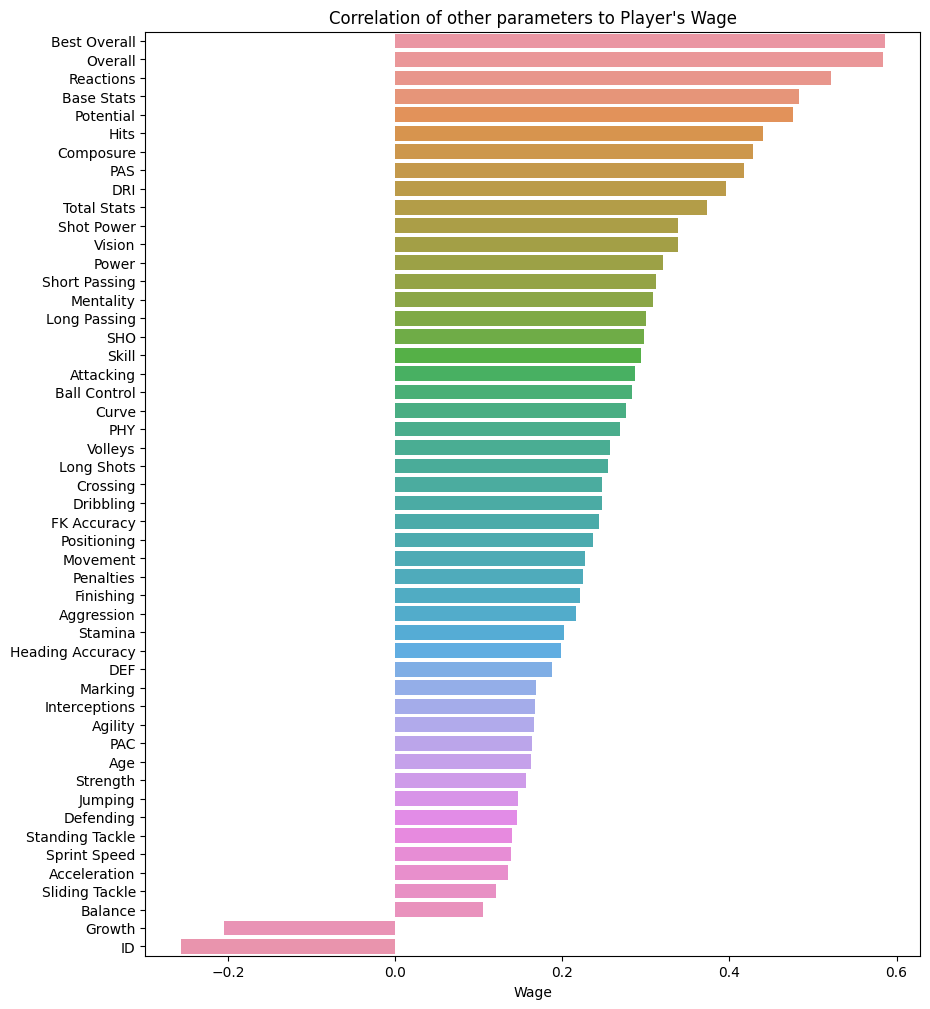

In [37]:
plt.figure(figsize=(10,12))

#calculate the corelation between wage and the other numeric variables
correlation=df.corr(numeric_only=True)['Wage'].drop(['Value','Wage','GK Diving','GK Kicking','GK Reflexes',
                                                     'GK Positioning','Goalkeeping','GK Handling','Height','Weight'])
correlation = correlation.sort_values(ascending=False)
sns.barplot(x=correlation,y=correlation.index)
plt.title("Correlation of other parameters to Player's Wage")
plt.show()

Below, shows the chart of top 10 player based on their overall performance

In [68]:
top_ten_players = df.loc[:, ['LongName', 'Nationality', 'Team', 'Overall', 'Value', 'Wage', 'Joined']]\
                   .sort_values(by='Overall', ascending=False).head(10)
top_ten_players

,LongName,LongName,Nationality,Team,Overall,Value,Wage,Joined
0,Lionel Messi,L. Messi,Argentina,FC Barcelona,93,67500000,560000,2004-07-01
1,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,Juventus,92,46000000,220000,2018-07-10
2,Jan Oblak,J. Oblak,Slovenia,Atlético Madrid,91,75000000,125000,2014-07-16
3,Kevin De Bruyne,K. De Bruyne,Belgium,Manchester City,91,87000000,370000,2015-08-30
4,Neymar da Silva Santos Jr.,Neymar Jr,Brazil,Paris Saint-Germain,91,90000000,270000,2017-08-03
5,Robert Lewandowski,R. Lewandowski,Poland,FC Bayern München,91,80000000,240000,2014-07-01
9,Sadio Mané,S. Mané,Senegal,Liverpool,90,78000000,250000,2016-07-01
10,Virgil van Dijk,V. van Dijk,Netherlands,Liverpool,90,75500000,210000,2018-01-01
11,Marc-André ter Stegen,M. ter Stegen,Germany,FC Barcelona,90,69500000,260000,2014-07-01
8,Mohamed Salah,M. Salah,Egypt,Liverpool,90,78000000,250000,2017-07-01
